In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
model_data = pd.read_csv('chasing_data.csv')
model_data = model_data[model_data.winner != 2]
X = model_data.iloc[:, :-1]
y = model_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [3]:
model_data.corr().style.background_gradient(cmap = 'coolwarm', axis = None)

,target,curr_rate,runs_required,balls_left,wickets_in_hand,req_rate,winner
target,1.000000,0.251110,0.472851,-0.028882,-0.167287,0.257447,0.428908
curr_rate,0.251110,1.000000,-0.157737,-0.138991,0.062732,-0.019297,-0.133602
runs_required,0.472851,-0.157737,1.000000,0.794755,0.442048,-0.016211,0.304736
balls_left,-0.028882,-0.138991,0.794755,1.000000,0.742475,-0.267088,-0.064377
wickets_in_hand,-0.167287,0.062732,0.442048,0.742475,1.000000,-0.365346,-0.332507
req_rate,0.257447,-0.019297,-0.016211,-0.267088,-0.365346,1.000000,0.253619
winner,0.428908,-0.133602,0.304736,-0.064377,-0.332507,0.253619,1.000000


In [4]:
log_reg = LogisticRegressionCV(cv = StratifiedKFold(shuffle = True, random_state = 42), scoring = 'roc_auc')
pipe = make_pipeline(StandardScaler(), log_reg)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [5]:
print(metrics.classification_report(y_train, pipe.predict(X_train), zero_division = 1))
print(metrics.classification_report(y_test, y_pred, zero_division = 1))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79     35130
           1       0.83      0.83      0.83     41940

    accuracy                           0.81     77070
   macro avg       0.81      0.81      0.81     77070
weighted avg       0.81      0.81      0.81     77070

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      8783
           1       0.83      0.83      0.83     10485

    accuracy                           0.81     19268
   macro avg       0.81      0.81      0.81     19268
weighted avg       0.81      0.81      0.81     19268



roc_auc_score (train):  0.8110318937997311
roc_auc_score (cross-validation):  0.8991694772641601
roc_auc_score (test):  0.8131278175297568


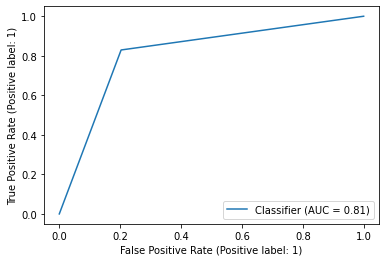

In [6]:
print("roc_auc_score (train): ", metrics.roc_auc_score(y_train, pipe.predict(X_train)))
scores = cross_val_score(pipe, X_train, y_train, scoring = 'roc_auc', cv = 5)
print("roc_auc_score (cross-validation): ", scores.mean())
print("roc_auc_score (test): ", metrics.roc_auc_score(y_test, y_pred))

metrics.RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

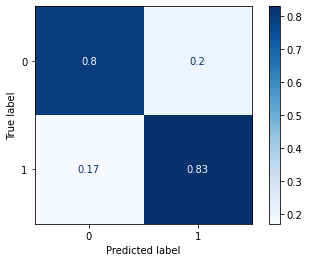

In [7]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize = 'true', cmap = plt.cm.Blues)
plt.show()

In [8]:
pipe.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregressioncv',
                 LogisticRegressionCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                                      scoring='roc_auc'))])

In [9]:
color_map = {
    'Afghanistan': '#2b1cff',
    'Australia': '#ffeb12',
    'India': '#4287f5',
    'Sri Lanka': '#0a008f',
    'West Indies': '#9c1a2a'
}

In [10]:
batting_team = 'India'
bowling_team = 'Sri Lanka'

In [11]:
def plot_chase_prog():
    plt.figure(figsize = (16, 8))
    plt.rcParams.update({
        'font.size': 16,
        'lines.linewidth': 3
    })
    plot_x = (120 - X_new.balls_left) / 6
    plot_y = X_new.win_prob_batting * 100

    plt.title('Chase Progression')
    plt.xlabel('Overs', labelpad = 16)
    plt.ylabel('Win Probability of Chasing Team (%)', labelpad = 16)

    line1, line2 = None, None
    
    for x1, y1, x2, y2 in zip(plot_x, plot_y, plot_x[1:], plot_y[1:]):
        if (y1 > 50 and y2 > 50):
            line1, = plt.plot([x1, x2], [y1, y2], color = color_map[batting_team])
        elif (y1 < 50 and y2 < 50):
            line2, = plt.plot([x1, x2], [y1, y2], color = color_map[bowling_team])
        elif (y1 > 50 and y2 < 50):
            intermediate_x = x1 + (((50 - y1) * (x2 - x1)) / (y2 - y1))
            line1, = plt.plot([x1, intermediate_x], [y1, 50], color = color_map[batting_team])
            line2, = plt.plot([intermediate_x, x2], [50, y2], color = color_map[bowling_team])
        else:
            intermediate_x = x1 + (((50 - y1) * (x2 - x1)) / (y2 - y1))
            line2, = plt.plot([x1, intermediate_x], [y1, 50], color = color_map[bowling_team])
            line1, = plt.plot([intermediate_x, x2], [50, y2], color = color_map[batting_team])

    if (line1 is not None and line2 is None):
        plt.legend([line1], [batting_team])
    elif (line1 is None and line2 is not None):
        plt.legend([line2], [bowling_team])
    elif (line1 is not None and line2 is not None):
        plt.legend([line1, line2], [batting_team, bowling_team])
        
    plt.gca().set_ylim([0, 100])
    plt.gca().yaxis.set_major_locator(plt.MultipleLocator(10))
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

    plt.axhline(50, color = 'grey', ls = '--')

    plt.show()

In [12]:
def plot_curr_prob():
    plt.figure(figsize = (16, 2))
    plt.rcParams.update({
        'font.size': 16,
        'lines.linewidth': 3
    })
    plot_x = [X_new.iloc[-1].win_prob_batting * 100, X_new.iloc[-1].win_prob_bowling * 100]
    plot_y = [batting_team, bowling_team]
    
    plt.xlabel('Win Probability (%)', labelpad = 16)
    
    plt.barh(plot_y, plot_x, color = color_map[batting_team])
    plt.barh(bowling_team,  X_new.iloc[-1].win_prob_bowling * 100, color = color_map[bowling_team])
    
    for x, y in enumerate(plot_x):
        plt.text(y, x, ' ' + '{:.1f}'.format(y) + '%', va = 'center', fontweight = 'bold')
    
    plt.gca().set_xlim([0, 105])
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
    plt.gca().invert_yaxis()
    
    plt.margins(0.2, 0.2)
    
    plt.show()

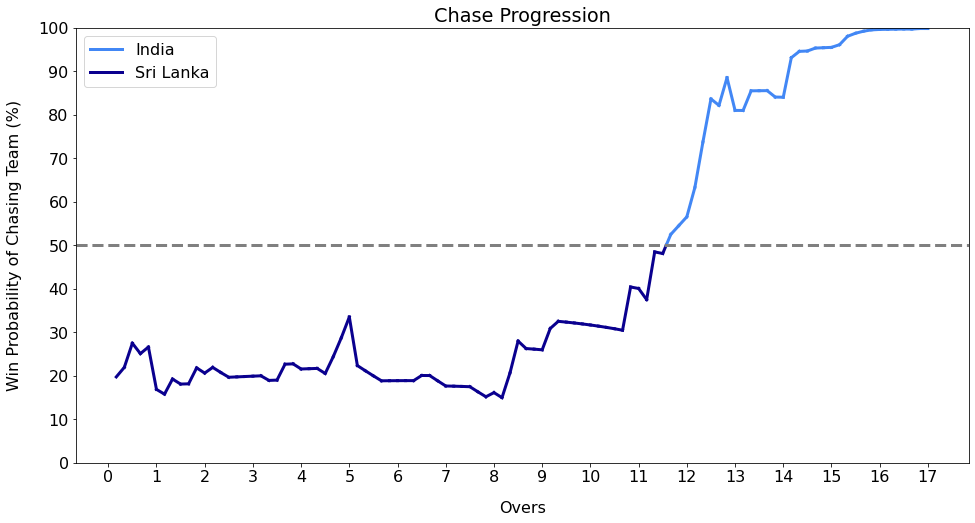

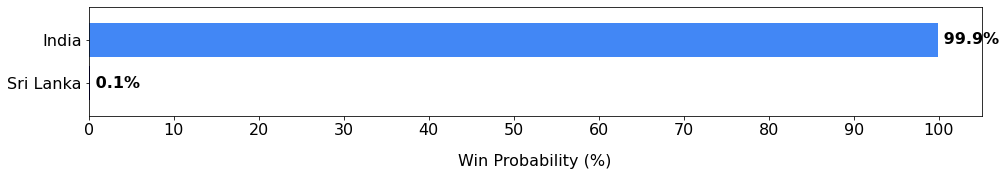

In [13]:
X_new = pd.read_csv('ind_vs_sl_2nd_t20i_chasing_data.csv')
X_new[['win_prob_batting', 'win_prob_bowling']] = pipe.predict_proba(X_new)

plot_chase_prog()
plot_curr_prob()